### Regression of pH

In [1]:
from tpot import TPOTRegressor
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

In [2]:
# data
acidoCEST_ML = pd.read_csv('acido_CEST_MRI_MegaBox_01_to_08_clean.csv')
acidoCEST_ML = acidoCEST_ML.drop(['Unnamed: 0','ApproT1(sec)','Temp','FILE','Conc(mM)'], axis = 1)
print(acidoCEST_ML.shape)

(36000, 89)


In [3]:
acidoCEST_ML

,pH,ExpT1(ms),ExpT2(ms),ExpB1(percent),ExpB0(ppm),ExpB0(Hz),SatPower(uT),SatTime(ms),-12,-11,...,7,7.2,7.4,7.6,7.8,8,9,10,11,12
0,6.24,402.70,201.72,118.130,0.58603,176.000,3.0,2000,0.994178,0.983831,...,0.971111,0.980716,0.979566,0.979752,0.984350,0.984906,0.984795,0.984350,0.984981,0.988652
1,6.38,388.31,214.49,107.810,0.70919,212.990,3.0,2000,0.992924,0.985348,...,0.980465,0.974735,0.983810,0.980580,0.989117,0.976427,0.985118,0.992963,0.982541,0.986118
2,6.58,393.20,217.77,103.080,0.76500,229.760,3.0,2000,0.994844,0.993349,...,0.990908,0.993978,0.986067,0.977566,0.994293,0.991026,0.993073,0.995671,0.995749,0.994293
3,6.69,389.14,217.87,106.210,0.63908,191.940,3.0,2000,0.983920,0.990491,...,0.977619,0.978972,0.969579,0.976034,0.980634,0.977116,0.982064,0.984422,0.980634,0.978856
4,6.84,379.38,214.10,111.260,0.33744,101.340,3.0,2000,0.998284,0.989862,...,0.979530,0.976333,0.986626,0.980583,0.986158,0.983624,0.992982,0.984248,0.985690,0.985417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,6.38,4112.50,601.83,101.610,0.22259,66.852,4.0,2000,0.993230,0.991712,...,0.957295,0.957801,0.955397,0.963685,0.965772,0.971340,0.970454,0.969379,0.977224,0.973871
35996,6.58,3918.70,575.72,109.390,0.33517,100.660,4.0,2000,0.979288,0.978693,...,0.940677,0.947761,0.947329,0.948518,0.962200,0.957766,0.959604,0.972637,0.972475,0.975827
35997,6.70,3911.10,593.31,106.630,0.40331,121.130,4.0,2000,0.994350,0.983577,...,0.938586,0.947827,0.960817,0.957015,0.945187,0.958494,0.969953,0.978560,0.972963,0.975022
35998,6.88,4043.40,632.75,99.980,0.35798,107.510,4.0,2000,0.988520,0.973213,...,0.949383,0.938830,0.944454,0.961153,0.959413,0.963356,0.961674,0.969676,0.977967,0.983243


In [4]:
# sample for development
#acidoCEST_ML = acidoCEST_ML.sample(n=2000)

## TPO training to get pipeline all features we can measure

In [5]:
%%time

X_train, X_test, y_train, y_test = train_test_split(  acidoCEST_ML.drop('pH',axis=1)
                                                    , acidoCEST_ML.pH 
                                                    , test_size=0.30, random_state=42)


tpot = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Selector-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot.fit(X_train,y_train)

date_time = datetime.datetime.now().strftime("%m_%d_%Y_%H:%M")
tpot.export('acidoCEST_ML_tpot_pH_regressor_'+date_time+'.py')

print('Score on test set: \n',tpot.score(X_test, y_test))

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: -0.060338713337455996

Generation 2 - Current best internal CV score: -0.060338713337455996

Generation 3 - Current best internal CV score: -0.060338713337455996

Generation 4 - Current best internal CV score: -0.060338713337455996

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestRegressor(SelectPercentile(MaxAbsScaler(StandardScaler(input_matrix)), percentile=91), bootstrap=True, max_features=0.8, min_samples_leaf=20, min_samples_split=4, n_estimators=100)
Score on test set: 
 -0.03868660656625833
CPU times: user 3min 8s, sys: 4.82 s, total: 3min 13s
Wall time: 24min 45s


(6.2, 7.4)

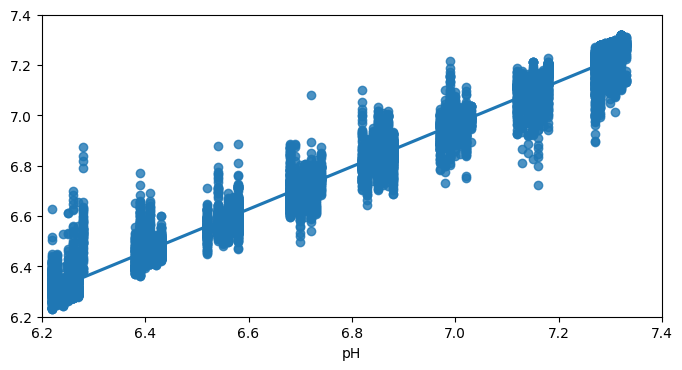

In [6]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)
sns.regplot(x=y_test,y=tpot.predict(X_test),ci=99,ax = ax)
plt.xlim([6.2,7.4])
plt.ylim([6.2,7.4])

In [7]:
sat_powers  = X_test['SatPower(uT)'].unique().tolist(); sat_powers.sort()

sat_times = X_test['SatTime(ms)'].unique().tolist(); sat_times.sort()

E = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )

for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)
        yhat = tpot.predict(X_test[f])
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E.loc[t,p] = error

Text(0.5, 1, 'Median Absolure Error in pH regression using all data \n')

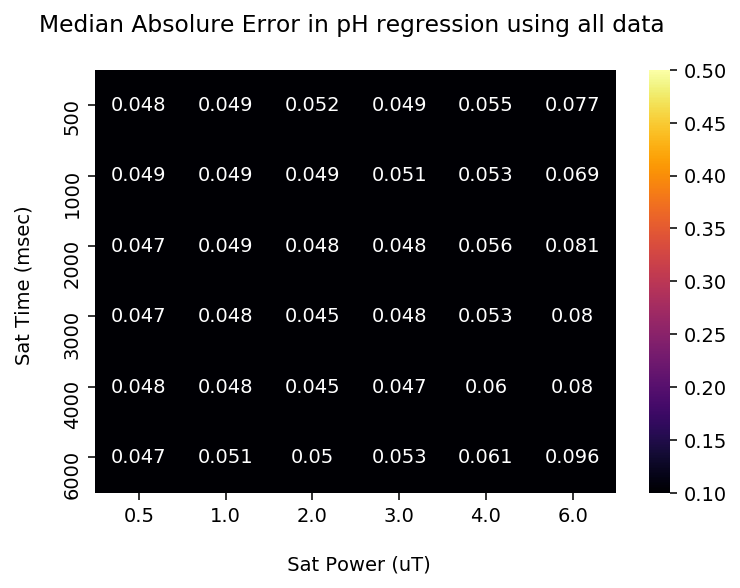

In [8]:
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using all data \n')

## TPO training to get pipeline with `only` CEST data
- note: You can compare the results with the model using the entire data if the models are different

In [9]:
drop_cols = ['ExpT1(ms)', 'ExpT2(ms)', 'ExpB1(percent)'
             , 'ExpB0(ppm)','ExpB0(Hz)', 'SatPower(uT)', 'SatTime(ms)']

In [10]:
%%time

tpot2 = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Selector-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot2.fit(X_train.drop(drop_cols,axis=1),y_train)

date_time = datetime.datetime.now().strftime("%m_%d_%Y_%H:%M")
tpot2.export('acidoCEST_ML_tpot_pH_regressor_CEST_only'+date_time+'.py')

print('Score on test set: \n',tpot2.score(X_test.drop(drop_cols,axis=1), y_test))

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: -0.2036241629197287

Generation 2 - Current best internal CV score: -0.17247810089240692

Generation 3 - Current best internal CV score: -0.17154401652780896

Generation 4 - Current best internal CV score: -0.15293142229710752

Generation 5 - Current best internal CV score: -0.15293142229710752

Generation 6 - Current best internal CV score: -0.15293142229710752

Generation 7 - Current best internal CV score: -0.15293142229710752

The optimized pipeline was not improved after evaluating 3 more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsRegressor(VarianceThreshold(RobustScaler(StandardScaler(input_matrix)), threshold=0.01), n_neighbors=3, p=1, weights=distance)
Score on test set: 
 -0.14626537576778587
CPU times: user 43 s, sys: 2.66 s, total: 45.6 s
Wall time: 31min 50s


(6.2, 7.4)

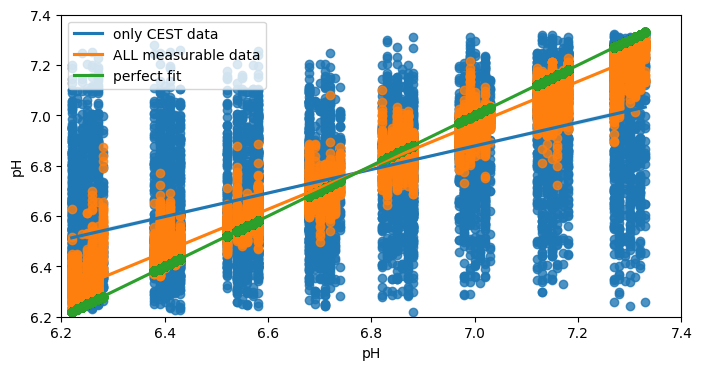

In [11]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)
sns.regplot(x=y_test,y=tpot2.predict(X_test.drop(drop_cols,axis=1)),ci=99,ax = ax)

sns.regplot(x=y_test,y=tpot.predict(X_test),ci=99,ax = ax)
sns.regplot(x=y_test,y= y_test,ci=99,ax = ax)

plt.legend(['only CEST data','ALL measurable data','perfect fit'])
plt.xlim([6.2,7.4])
plt.ylim([6.2,7.4])


Text(0.5, 1, 'Median Absolure Error in pH regression using only CEST data \n')

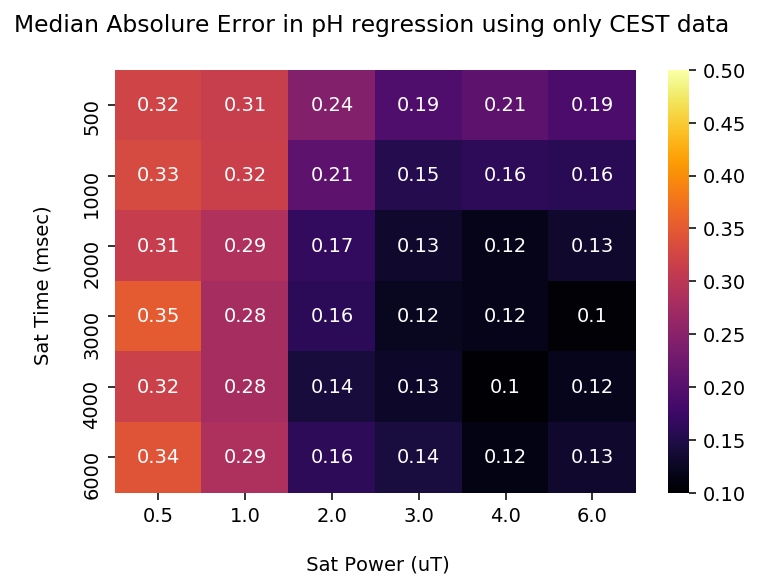

In [12]:
sat_powers  = X_test['SatPower(uT)'].unique().tolist(); sat_powers.sort()

sat_times = X_test['SatTime(ms)'].unique().tolist(); sat_times.sort()

E2 = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )
for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)
        yhat = tpot2.predict(X_test[f].drop(drop_cols,axis=1))
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E2.loc[t,p] = error
        
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E2, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using only CEST data \n')

### Minimal freqs

In [13]:
C = np.corrcoef(X_train[ X_train.columns[7::] ], rowvar=False)

Text(0, 0.5, 'Standard Deviation')

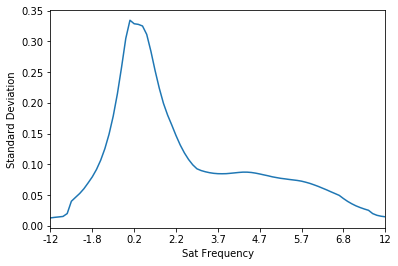

In [14]:
v = np.var(X_train[ X_train.columns[7::] ],axis=0)
np.sqrt(v).plot()
plt.xlabel('Sat Frequency')
plt.ylabel('Standard Deviation')

In [15]:
new_cols = X_train.columns[0:7].tolist()

new_cols.extend(v[v>=.01].index.tolist())
new_cols.remove('ExpT1(ms)')
new_cols.remove('ExpT2(ms)')
new_cols

['ExpB1(percent)',
 'ExpB0(ppm)',
 'ExpB0(Hz)',
 'SatPower(uT)',
 'SatTime(ms)',
 '-1.4',
 '-1.2',
 '-1',
 '-0.8',
 '-0.6',
 '-0.4',
 '-0.2',
 '0',
 '0.2',
 '0.4',
 '0.6',
 '0.8',
 '1',
 '1.2',
 '1.4',
 '1.6',
 '1.8',
 '2',
 '2.2',
 '2.4',
 '2.6',
 '2.8']

In [16]:
new_cols

['ExpB1(percent)',
 'ExpB0(ppm)',
 'ExpB0(Hz)',
 'SatPower(uT)',
 'SatTime(ms)',
 '-1.4',
 '-1.2',
 '-1',
 '-0.8',
 '-0.6',
 '-0.4',
 '-0.2',
 '0',
 '0.2',
 '0.4',
 '0.6',
 '0.8',
 '1',
 '1.2',
 '1.4',
 '1.6',
 '1.8',
 '2',
 '2.2',
 '2.4',
 '2.6',
 '2.8']

In [17]:
tpot3 = TPOTRegressor(    generations= 10, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=10
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot3.fit(X_train[new_cols],y_train)

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: -0.2306513731674813

Generation 2 - Current best internal CV score: -0.18904683188517124

Generation 3 - Current best internal CV score: -0.13231632376837807

Generation 4 - Current best internal CV score: -0.13061908722640103

Generation 5 - Current best internal CV score: -0.0680638888888933

Generation 6 - Current best internal CV score: -0.0680638888888933

Generation 7 - Current best internal CV score: -0.0680638888888933

Generation 8 - Current best internal CV score: -0.0680638888888933

Generation 9 - Current best internal CV score: -0.0680638888888933

31.38 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(StandardScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=2, min_samples_

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=3,
              disable_update_check=False, early_stop=10, generations=10,
              log_file=None, max_eval_time_mins=5, max_time_mins=30,
              memory=None, mutation_rate=0.9, n_jobs=4, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=10,
              random_state=None,
              scoring=make_scorer(median_absolute_error, greater_is_better=False),
              subsample=1.0, template='StandardScaler-Transformer-Regressor',
              use_dask=False, verbosity=2, warm_start=False)

(6.2, 7.4)

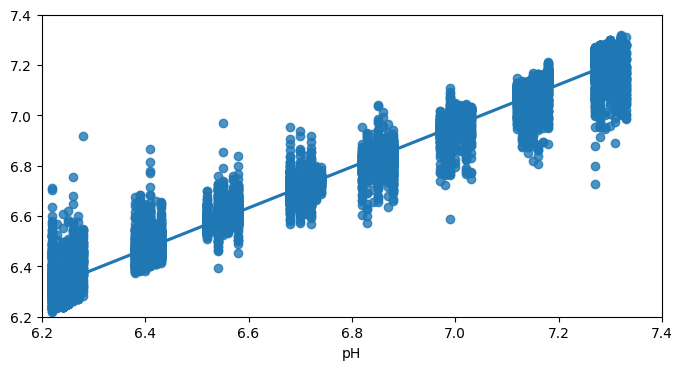

In [18]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)
sns.regplot(x=y_test,y=tpot3.predict(X_test[new_cols]),ci=99,ax = ax)

plt.xlim([6.2,7.4])
plt.ylim([6.2,7.4])

Text(0.5, 1, 'Median Absolure Error in pH regression using only select CEST data and all other exp data \n')

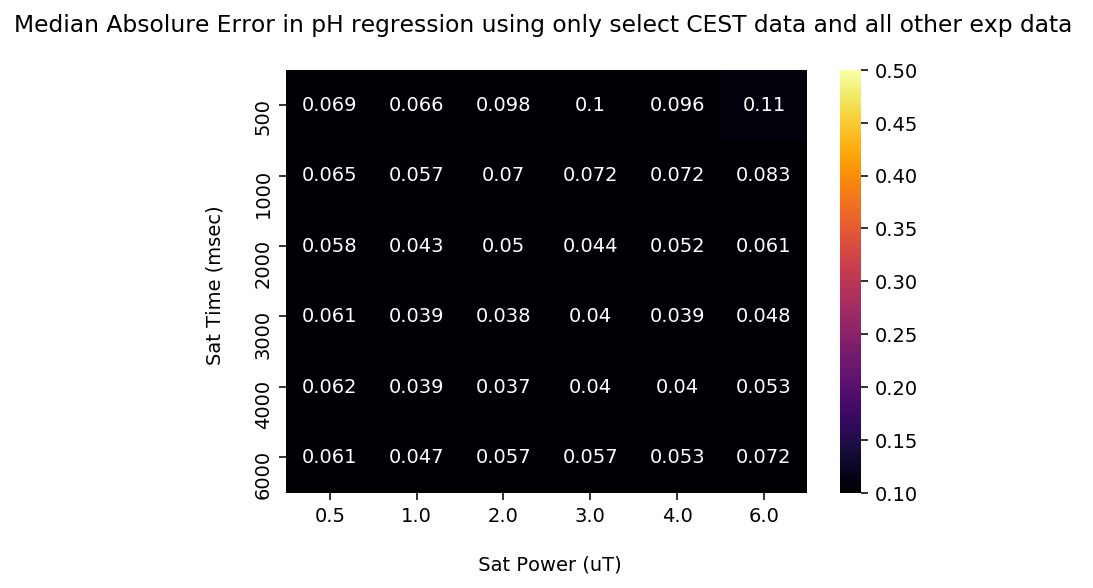

In [19]:
E3 = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )
for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)

        yhat = tpot3.predict( X_test[f][new_cols]  )
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E3.loc[t,p] = np.round(error,4)
        
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E3, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using only select CEST data and all other exp data \n')

Text(0.5, 1, 'Median Absolure Error in pH regression using only select CEST data and all other exp data \n')

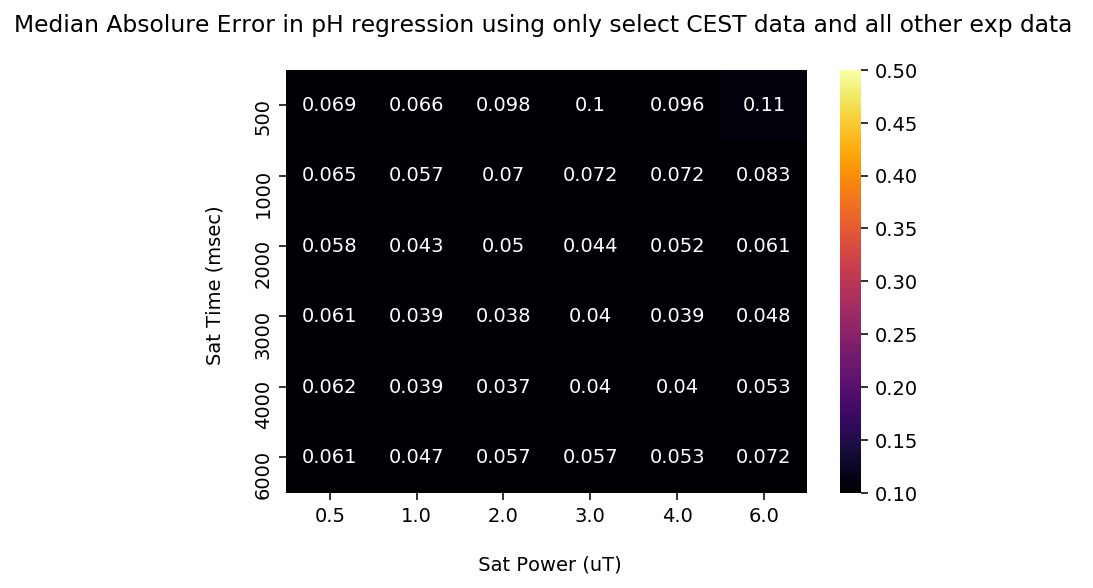

In [20]:
E3 = pd.DataFrame(data = np.zeros(  ( len(sat_times) , len(sat_powers) )  )
                 , columns=sat_powers
                 , index = sat_times )
for t in sat_times:
    for p in sat_powers:
        f = (X_test['SatPower(uT)'] == p) & (X_test['SatTime(ms)']== t)

        yhat = tpot3.predict( X_test[f][new_cols]  )
        error = metrics.mean_absolute_error(y_test[f], yhat)
        E3.loc[t,p] = np.round(error,4)
        
fig, ax = plt.subplots(dpi = 140)
sns.heatmap(E3, cmap='inferno',ax = ax, vmin=.1, vmax=0.50,annot=True)
plt.xlabel('\n Sat Power (uT)')
plt.ylabel('Sat Time (msec) \n')
plt.title('Median Absolure Error in pH regression using only select CEST data and all other exp data \n')

In [21]:
date_time = datetime.datetime.now().strftime("%m_%d_%Y_%H:%M")
tpot3.export('acidoCEST_ML_tpot_pH_regressor_CEST_few_all_exp'+date_time+'.py')


In [22]:
%%time
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Average CV score on the training set was: -7.993605777301127e-15
pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(bootstrap=False, max_features=0.90
                          , min_samples_leaf=8
                          , min_samples_split=20
                          , n_estimators=100)
)


pipe.fit( X_train[new_cols],y_train )

CPU times: user 52.6 s, sys: 86.6 ms, total: 52.7 s
Wall time: 53.3 s


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features=0.9, max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=8, min_samples_split=20,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [23]:
results = pipe.predict(X_test[new_cols])

In [24]:
results

array([7.008375, 6.98    , 7.127825, ..., 6.24    , 6.7     , 6.72    ])

(6.2, 7.4)

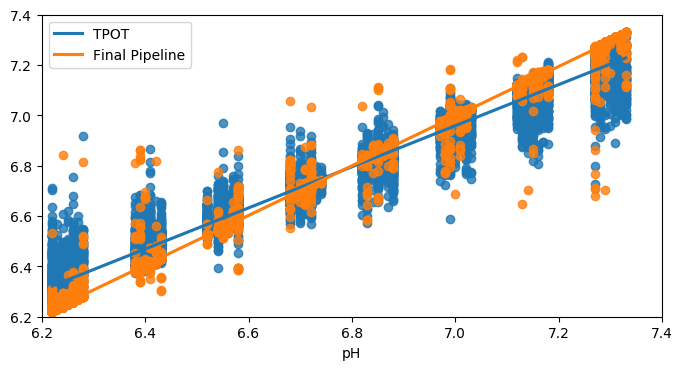

In [25]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)

sns.regplot(x=y_test,y=tpot3.predict(X_test[new_cols]),ci=99,ax = ax)
sns.regplot(x=y_test,y=pipe.predict(X_test[new_cols]),ci=99,ax = ax)

plt.legend(['TPOT','Final Pipeline'])
plt.xlim([6.2,7.4])
plt.ylim([6.2,7.4])

In [26]:
tpot3 = TPOTRegressor(    generations= 3, population_size=10, verbosity=2, n_jobs= 4 , cv = 3
                        , early_stop=3
                        , max_time_mins= 30
                        , template = 'StandardScaler-Transformer-Regressor'
                        , scoring = metrics.make_scorer(metrics.median_absolute_error,greater_is_better=False) )

tpot3.fit(X_train[ X_train.columns[0:7] ] ,y_train)

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.0

Generation 2 - Current best internal CV score: 0.0

Generation 3 - Current best internal CV score: 0.0

Best pipeline: KNeighborsRegressor(PolynomialFeatures(StandardScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), n_neighbors=1, p=1, weights=distance)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=3,
              disable_update_check=False, early_stop=3, generations=3,
              log_file=None, max_eval_time_mins=5, max_time_mins=30,
              memory=None, mutation_rate=0.9, n_jobs=4, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=10,
              random_state=None,
              scoring=make_scorer(median_absolute_error, greater_is_better=False),
              subsample=1.0, template='StandardScaler-Transformer-Regressor',
              use_dask=False, verbosity=2, warm_start=False)

(6.2, 7.4)

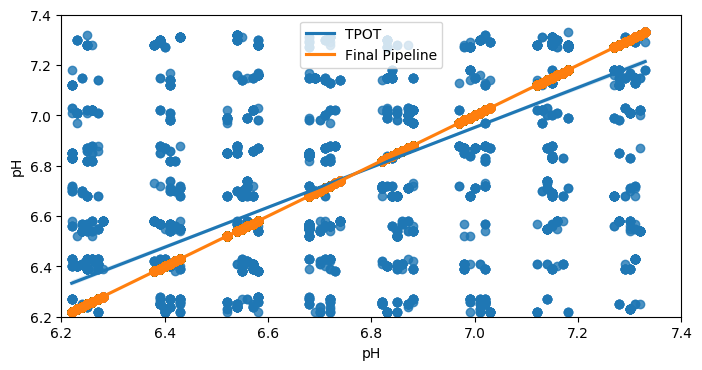

In [27]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)

sns.regplot(x=y_test,y=tpot3.predict(X_test[X_train.columns[0:7]]),ci=99,ax = ax)
sns.regplot(x=y_test,y= y_test,ci=99,ax = ax)

plt.legend(['TPOT','Final Pipeline'])
plt.xlim([6.2,7.4])
plt.ylim([6.2,7.4])

## Pipeline

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV

In [29]:
categorical_features = ['ExpT1(ms)','ExpT2(ms)',
                        'ExpB1(percent)', 'ExpB0(ppm)', 'ExpB0(Hz)', 'SatPower(uT)', 'SatTime(ms)']

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class SelectCols(BaseEstimator, TransformerMixin):

    def __init__(self, cols):
        if not isinstance(cols, list):
            self.cols = [cols]
        else:
            self.cols = cols

    def fit(self, X: pd.DataFrame, y: pd.Series):
        # there is nothing to fit
        return self

    def transform(self, X:pd.DataFrame):
        X = X.copy()
        return X[self.cols]

In [31]:
categorical_features


['ExpT1(ms)',
 'ExpT2(ms)',
 'ExpB1(percent)',
 'ExpB0(ppm)',
 'ExpB0(Hz)',
 'SatPower(uT)',
 'SatTime(ms)']

# this is a pipeline
we need to do grid search 

In [32]:
s1_cest = ('colse',  SelectCols(cols=   X_train.drop(categorical_features,axis = 1).columns.tolist()   ) )
s2_cest = ('varsel', VarianceThreshold(threshold= 0.01) )
s3_cest = ('scale',StandardScaler() )

pipe_cest = Pipeline([ s1_cest, s2_cest, s3_cest  ])


s1_exp = ('expsel',  SelectCols(cols=   ['ExpT1(ms)','ExpT2(ms)'] ) )
s2_exp = ('varsel', VarianceThreshold(threshold= 0.01) )
s3_exp = ('scale',StandardScaler() )

pipe_exp = Pipeline([ s1_exp, s2_exp, s3_exp  ])

rf =     RandomForestRegressor( bootstrap=False, max_features=0.90
                          , min_samples_leaf=8
                          , min_samples_split=20
                          , n_estimators=100)

union = FeatureUnion([("CEST", pipe_cest ),
                      ("EXP" , pipe_exp ) ])


pipe = Pipeline(steps=[('select_vars', union), ('RF', rf)])


param_grid = dict(  RF__n_estimators=[10,50,100]
                   ,select_vars__CEST__varsel__VarianceThreshold=[0., .01,.05,.10,.50])

grid = GridSearchCV(pipe, n_jobs=3, param_grid=param_grid,verbose=2, pre_dispatch=3 , cv = 3 ,return_train_score=True)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


ValueError: Invalid parameter VarianceThreshold for estimator VarianceThreshold(threshold=0.01). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
grid.be

In [ ]:
select_vars__CEST__varsel__VarianceThreshold=[0., .01,.05,.10,.50]

In [ ]:
pipe['select_vars']['colse']

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100)

sns.regplot(x=y_test,y=grid.predict(X_test),ci=99,ax = ax)
sns.regplot(x=y_test,y= y_test,ci=99,ax = ax)

plt.legend(['TPOT','Final Pipeline'])
plt.xlim([6.2,7.4])
plt.ylim([6.2,7.4])

In [ ]:
pipe_cest

In [ ]:
estimators = [('reduce_dim', PCA()), ('clf', SVC())]


In [ ]:
s1 = ('s1',StandardScaler())
s2 = ( 's2',  )

cest_cols = ColumnTransformer(  transformers = [s1,s2])
     

In [ ]:
preprocessor.fit_transform(X_test,y_test)

In [ ]:

cs = DropSomeColumns(cols= cols)

In [ ]:
cs.fit_transform(X_train,y_train)

In [ ]:
cols = 